In [3]:
import numpy as np
from scipy.integrate import quad, trapz
from scipy.signal import square
from numerical_methods import NumericalIntegration # Собственная реализация численных методов
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Игнорируем предупреждения
%matplotlib inline
fig_size = [8, 6] # Настраиваем размер фигуры
plt.rcParams["figure.figsize"] = fig_size

## Метод трапеции 

### Опредиление

Метод трапеции работает, аппроксимируя область под графиком функции $f(x)$ как трапецию и вычисляя ее площадь. Интеграл может быть еще лучше аппроксимирован путем разбиения интервала интегрирования, применения метод трапеции к каждому подинтервалю и суммирования результатов.

Площадь трапеции на каждом отрезке:

$I_{i} \approx  \frac{f(x_{i-1})+f(x_{i})}{2} (x_{i}-x_{i-1})$

Состованя формула:

$I = \int_{a}^{b}f\left ( x \right )dx\approx h \left ( \frac{f(x_{0})+f(x_{n})}{2} +\sum_{i=1}^{n-1}f\left ( x_{i} \right ) \right )$, где шаг разбиения интервала интегрирования $h = \frac{b-a}{n}$, $n$ – колличество разбиений.

### Порядок точности

Оценим порядок точности. Численный метод имеет порядок точности $d$, если его остаток $R_{n}$ равен нулю для любого полинома степени $d$, но не равен нулю для полинома степени $d+1$.

##### Полином первой степени

Интегрируем аналитически полином первой степени в общем виде. 

$I_{analytic} = \int_{a}^{b}\alpha_{1}x+\alpha_{2} dx = (b-a)\frac{\alpha_{1}(b-a)+2\alpha_{2}}{2}$

Интегрируем числено полином первой степени в общем виде. 

$I_{numeric} = 
\int_{a}^{b}\alpha_{1}x+\alpha_{2} dx = 
h \left ( \frac{\alpha_{1}(b+a)+2\alpha_{2}}{2}+\sum_{i=1}^{n-1}(\alpha_{1}x_{i}+\alpha_{2})\right)=
\frac{b-a}{n} \left ( \frac{\alpha_{1}(b+a)+2\alpha_{2}}{2}+(n-1)\alpha_{2} +\alpha_{1}\sum_{i=1}^{n-1}x_{i}\right)=
\frac{b-a}{n} \left ( \frac{\alpha_{1}(b+a)+2\alpha_{2}}{2}+\frac{\alpha_{1}(b+a)+2\alpha_{2}}{2}(n-1)\right)=
(b-a)\frac{\alpha_{1}(b-a)+2\alpha_{2}}{2}$

Видно, что $I_{analytic} = I_{numeric}$. Значит остаток $R_{n}$ равен нулю для любого полинома степени $1$.

##### Полином второй степени

Интегрируем аналитически полином второй степени в общем виде. 

$I_{analytic} = \int_{a}^{b}\alpha_{1}x+\alpha_{2}x+\alpha_{3}x dx = (b-a)\frac{2\alpha_{1}(a^2+ab+b^2)+3\alpha_{2}(a+b)+6\alpha_{3}}{6}$

Интегрируем числено полином второй степени в общем виде. 

$I_{numeric} = 
\int_{a}^{b}\alpha_{1}x+\alpha_{2}x+\alpha_{3}x dx = 
\frac{(b-a)}{n}\left (\frac{\alpha_{1}(b^2+a^2)+\alpha_{2}(a+b)+2\alpha_{3}}{6} - (n-1)\alpha_{1}\left [ a^2+2a(b-a)+\frac{(b-a)^2(2n-1)}{6n} \right ]+\alpha_{2}\frac{a+b}{2}+\alpha_{3} \right )$ 

Видно, что $I_{analytic} = I_{numeric}$ только при некоторых значениях $h$. Поэтому остаток $R_{n}$ не равен нулю для любого полинома степени $2$. Следовательно, численный метод имеет порядок точности $1$.

### Тестирование метода

Проведем тестирование на трёх различных функциях (гладкая, разрывная, осциллирующая). Сравним численно полученный результат с посчитанным численно с помощью функиц пакета SciPy: ___quad___, ___trapz___. Нарисуем графики ошибки $E(h)$ в зависимости от шага сетки для каждого эксперимента.
1. ___Quad___ – находит значение определенного интеграла заданной функции с помощью библиотеки, реализованной на _FORTRAN_. 
2. ___Trapz___ – реализация метода трапеций.

In [9]:
def linear(x):
    return x

def cubic(x):
    return x**3

def Runge_rool(p, func, estimated_func):
    model = NumericalIntegration()
    h=0.1
    x0 = np.arange(0.0, 100.0, h/2)
    x1 = np.arange(0.0, 100.0, h)
    print((func(estimated_func(x1), x1) - func(estimated_func(x0), x0))/(2**p-1))

# TODO
def test_trapezium_method(func):
    Hs = np.linspace(0.01, np.pi, 100)[::-1]
    model = NumericalIntegration()
    Es = []
    Es2 = []
    for h in Hs:
        x = np.arange(0.0, 100.0, h)
        y = func(x)
        Es.append(abs(model.trapezium_method(y, x) - quad(func, x[0], x[-1])[0]))
        Es2.append(abs(model.trapezium_method(y, x) - trapz(y, x)))
    plt.plot(Hs, Es, label="abs(trapezium_method - scipy.integrate.quad)")
    plt.plot(Hs, Es2, label="abs(trapezium_method - scipy.integrate.trapz)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(r'$E(h)$ for {} function'.format(func.__name__))
    plt.ylabel(r'$E(h)$')
    plt.xlabel(r'$h$')
    plt.show()
    
def log_trapezium_error(func):
    Hs = np.linspace(0.01, np.pi, 150)[::-1]
    model = NumericalIntegration()
    Es = []
    Ns = []
    for h in Hs:
        x = np.arange(0.0, 100.0, h)
        y = func(x)
        Es.append(np.log(abs(model.trapezium_method(y, x) - quad(func, x[0], x[-1])[0])))
        Ns.append(len(x))
    plt.plot(np.log(Ns), Es, label="abs(trapezium_method - scipy.integrate.quad)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.xscale("log")
#     plt.yscale("log")
    plt.title(r'$logE(N)$ for {} function'.format(func.__name__))
    plt.ylabel(r'$logE(N)$')
    plt.xlabel(r'$log(N)$')
    plt.show()
    
# Функция считает ошибку метода для множество шагов Hs для выбранных приближаемых функций func_list.
def test_methods(func_list, test_func):
    for i in range(len(func_list)):
        test_func(func_list[i])

Тестируем следующие функции:  

1. Линейную функцию $y=x$
2. Квадратный корень $y=\sqrt{x}$
3. Квадратную волну $y = sgn(sin(x))$ (как пример разрывной функции) 
4. Синус $y = sin(x)$ (как пример осцилирующей функции)
5. Кубическую функцию $y=x^3$

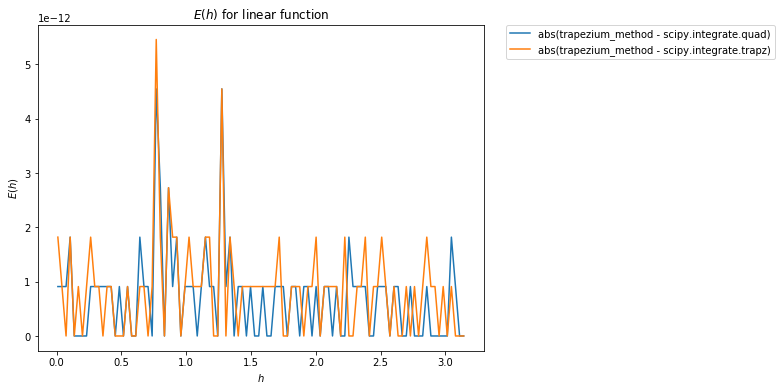

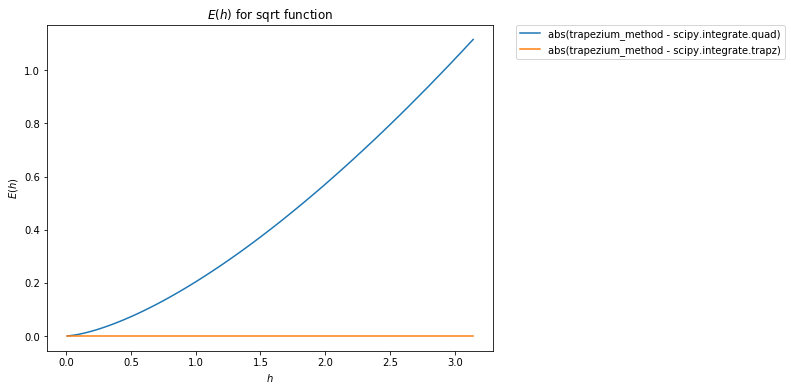

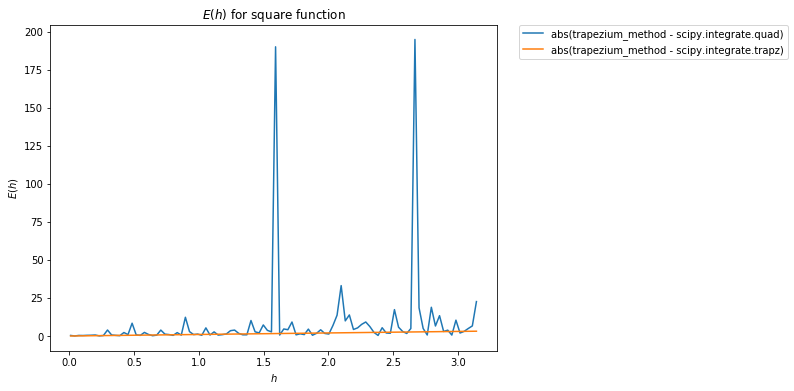

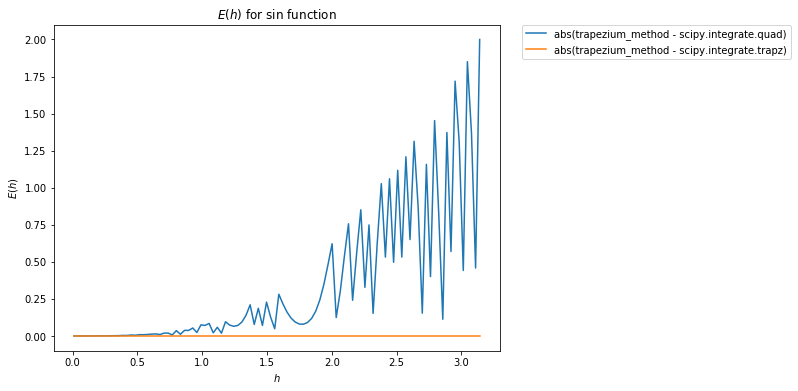

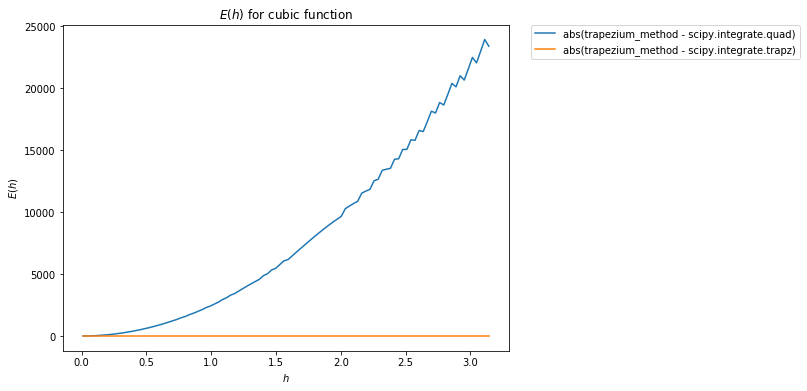

In [5]:
test_methods([linear, np.sqrt, square, np.sin, cubic], test_trapezium_method)

Проверем порядок точности экспериментально, вычислив численно интеграл от функций при уменьшающемся шаге сетки $h$ (и, соответственно, большем числе разбиений) и нарисовав график погрешности (по сравнению с более точным решением) в осях ($log(N)$, $logE(N)$), где $N$ – число сегментов, на которых применяется простая формула.

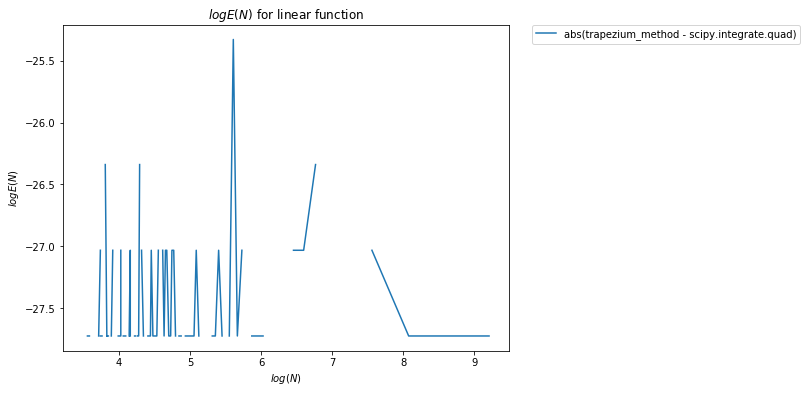

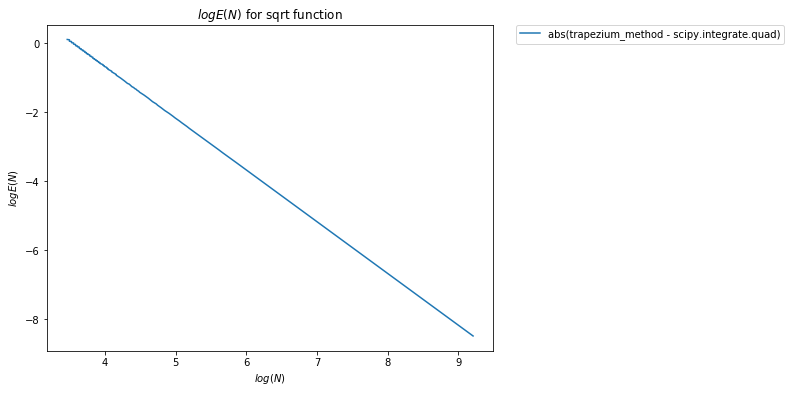

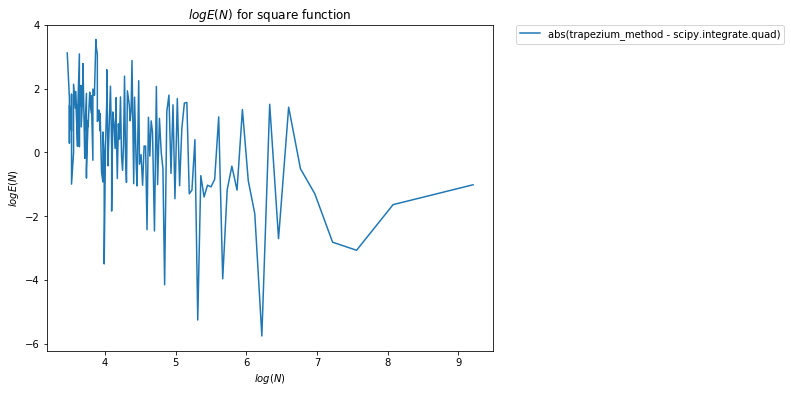

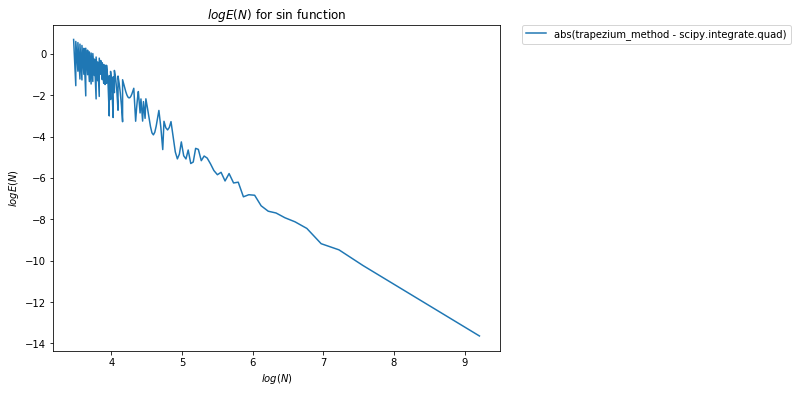

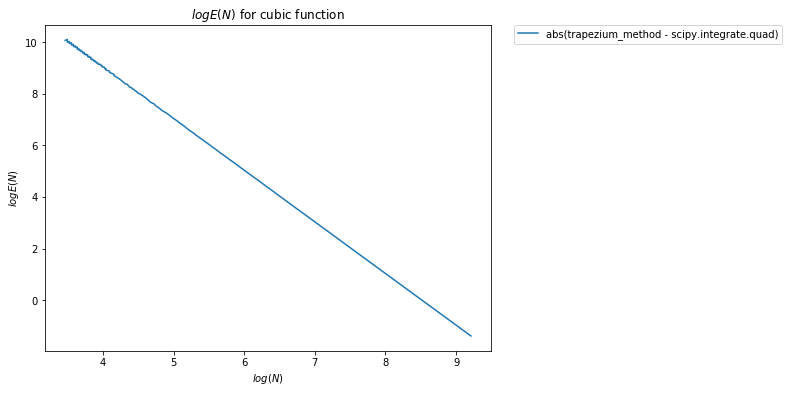

In [10]:
test_methnp.linspace(0.01, np.pi, 150)[::-1]ods([linear, np.sqrt, square, np.sin, cubic], log_trapezium_error)

В силу того, что численный метод имеет порядок точности $1$, линейная функция опроксимируемся без ошибок, но на графике они тем не менее видны из-за числе с плавающей запятой.

Кубический корень и синус хорошо апроксимируются для больших значений $N$.

Квадратная волна, вероятно, плохо апроксимируется из-за разрыва в первой производной, когда $sin(x_{i})$ принимает положительное значение, а $sin(x_{i+1})$ – отрицательное. Прямая, соединяющая точки, проводится не под прямым углом, поэтому ошибка возрастает. Однако когда разбиения делаются с частотой $f/2$, где $f$ – частота волны, значение ошибки падает. 

ХУже всех аппроксимируется кубический полином, что соответствует результатам, представленным в начале отчета: численный метод имеет порядок точности $1$, а значит плохо апроксимирует полиномы степени $>1$. 